In [1]:
#importing required library
import requests
import os
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce
import re

## Downloading file manually

In [2]:
#reading the downloaded csv file to a pandas datframe
df_tae = pd.read_csv('twitter-archive-enhanced.csv')

## Downloading a file programatically from the web

In [3]:
current_dir = os.getcwd()
print(current_dir)

C:\Users\user\Desktop\Udacity\Project Two


In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
#storing our response content as a file in our current working directory
with open(os.path.join(current_dir, url.split('/')[-1]), mode='wb')as file:
    file.write(response.content)

In [6]:
#assigning dataframe to a variable indicating the sep parameter
df_img = pd.read_csv('image-predictions.tsv', sep = '\t')

## Gatthering data from twitter api

In [7]:
#import tweepy from tweepy 
#import OAuthHandler 
#import json from timeit 
#import default_timer as timer # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file # These are hidden to comply with Twitter's API terms and conditions 
#consumer_key = 'HIDDEN' 
#consumer_secret = 'HIDDEN' 
#access_token = 'HIDDEN' 
#access_secret = 'HIDDEN' 
#auth = OAuthHandler(consumer_key, consumer_secret) auth.set_access_token(access_token, access_secret) 
#api = tweepy.API(auth, wait_on_rate_limit=True) # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES: # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv # NOTE TO REVIEWER: this student had mobile verification issues so the following # Twitter API code was sent to this student from a Udacity instructor # Tweet IDs for which to gather additional data via Twitter's API 
#tweet_ids = df_1.tweet_id.values len(tweet_ids) # Query Twitter's API for JSON data for each tweet ID in the Twitter archive count = 0 fails_dict = {} start = timer() # Save each tweet's returned JSON as a new line in a .txt file with open('tweet_json.txt', 'w') as outfile: # This loop will likely take 20-30 minutes to run because of Twitter's rate limit for tweet_id in tweet_ids: count += 1 print(str(count) + ": " + str(tweet_id)) try: tweet = api.get_status(tweet_id, tweet_mode='extended') print("Success") json.dump(tweet._json, outfile) outfile.write('\n') except tweepy.TweepError as e: print("Fail") fails_dict[tweet_id] = e pass end = timer() print(end - start) print(fails_dict)

In [8]:
# loading data gotten from Twitter API
with open('tweet-json.txt') as f:
    df_tweet_api = pd.DataFrame((json.loads(line) for line in f),
# select the columns
columns = ['id', 'retweet_count','favorite_count'])

## Accessing The Dataset

#### Visual Accessment

In [9]:
#visually accessing twitter-archive-enhanced
df_tae

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
#visually assessing the image predictions dataset
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
#visually assessing the tweet-json.txt dataset
df_tweet_api

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### Programatic Accessment

In [12]:
#the summary of the image prediction dataframe
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
#the summary of the twitter archive enhanced dataframe
df_tae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#the summary of the tweet-json.txt dataframe
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [15]:
#checking for null values
df_tweet_api.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

In [16]:
#checking for null values
df_tae.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [17]:
#checking for null values
df_img.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [18]:
df_tae['source'].duplicated()


0       False
1        True
2        True
3        True
4        True
        ...  
2351     True
2352     True
2353     True
2354     True
2355     True
Name: source, Length: 2356, dtype: bool

### Quality 
### `df_tae` table:
- some columns aren't needed 
- null entires are being interpreted as None in 'doggo' 'floofer' 'pupper' 'puppo' columns
- missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, columns
- incorrect time datatype
- 'a','an', 'None', 'the' values in name column
- some text columns contains links and some dont


### `df_img` table:
- dog breeds names are seperated with underscores rather than a space
- some dog breed names begin with lower case while some upper case that is inconsistent

### `tweet_id` table

- The 'id' column name in df_twitter_api data set can be changed to 'tweet_id'

### Tidyness
- The 4 different columns doggo, floofer, pupper and puppo, are all relative to the same variable that identifies the stage of dog
- The three datasets can be merged for better analysis
 

## Clean

In [20]:
df_tae_clean = df_tae.copy()
df_img_clean = df_img.copy()
df_tweet_api_clean = df_tweet_api.copy()

In [21]:
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_id.isnull()]
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_user_id.isnull()]
df_tae_clean = df_tae_clean[df_tae_clean.retweeted_status_timestamp.isnull()]

#### Define
- Drop columns that aren't needed 
- Rectify missing values in in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, columns

#### Code

In [22]:
df_tae_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                       'retweeted_status_user_id', 'expanded_urls','retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [23]:
df_tae_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [24]:
df_tae_clean.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

#### Code

#### Test

#### Define
- correct the time datatype

#### Code

In [25]:
df_tae_clean['timestamp'] = pd.to_datetime(df_tae_clean['timestamp'])

#### Test

In [26]:
df_tae_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.9+ KB


#### Define
- fix invalid values ('a','an', 'the') in name column by replacing with None

#### Code

In [27]:
for val in ['a','an', 'the','Bo', 'O']:
    df_tae_clean.replace({val: None}, inplace = True)

#### Test

In [28]:
(df_tae_clean['name']== 'a').sum()

0

In [29]:
(df_tae_clean['name']== 'an').sum()

0

In [30]:
(df_tae_clean['name']== 'the').sum()

0

In [31]:
(df_tae_clean['name']== 'Bo').sum()

0

In [32]:
(df_tae_clean['name']== 'O').sum()

0

#### Define
- Removing the links from values in the text column

#### Code

In [33]:
df_tae_clean['text'] = df_tae_clean['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

#### Test

In [34]:
df_tae_clean['text']

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2175, dtype: object

#### Define
- seperate Dog breed name with space rather than underscores 

#### Code

In [35]:
df_img_clean.p1 = df_img_clean.p1.str.replace('_',' ')
df_img_clean.p2 = df_img_clean.p1.str.replace('_',' ')
df_img_clean.p3 = df_img_clean.p1.str.replace('_',' ')

#### Test

In [36]:
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Welsh springer spaniel,0.156665,True,Welsh springer spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,redbone,0.074192,True,redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,German shepherd,0.138584,True,German shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Rhodesian ridgeback,0.360687,True,Rhodesian ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,miniature pinscher,0.243682,True,miniature pinscher,0.154629,True


#### Define
- Change dog breed names to all begin with upper case 

#### Code

In [37]:
 df_img_clean.p1 = df_img_clean.p1.str.title()

In [38]:
df_img_clean.p2 = df_img_clean.p2.str.title()

In [39]:
df_img_clean.p3 = df_img_clean.p3.str.title()

#### Test

In [40]:
df_img_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Welsh Springer Spaniel,0.156665,True,Welsh Springer Spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Redbone,0.074192,True,Redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,German Shepherd,0.138584,True,German Shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Rhodesian Ridgeback,0.360687,True,Rhodesian Ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Miniature Pinscher,0.243682,True,Miniature Pinscher,0.154629,True


#### Define
- The 'id' column name in df_twitter_api data set can be changed to 'tweet_id'

#### Code

In [41]:
df_tweet_api_clean = df_tweet_api_clean.rename(columns = {'id':'tweet_id'})

#### Test

In [42]:
df_tweet_api_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### Define
* melt doggo, floofer, pupper and puppo columns into a single column named "dog stage"

#### Code

In [43]:
# extract dog types from the text column
for index, column in df_tae_clean.iterrows():
    for word in ['doggo', 'floofer','pupper', 'puppo']:
        if word.lower() in str(df_tae_clean.loc[index, 'text']).lower():
            df_tae_clean.loc[index, 'dog_types'] = word.title()
            
# dropping the old columns
df_tae_clean.drop(['doggo', 'floofer','pupper', 'puppo'],axis=1, inplace=True)

#### Test

In [44]:
df_tae_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_types
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN


#### Define
- The three datasets can be merged for better analysis



#### Code

In [45]:
df_merged = df_tweet_api_clean.merge(df_tae_clean, on = 'tweet_id').merge(df_img_clean, on='tweet_id')

#### Test

In [46]:
df_merged.head()

,tweet_id,retweet_count,favorite_count,timestamp,source,text,rating_numerator,rating_denominator,name,dog_types,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,8853,39467,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,...,1,Orange,0.097049,False,Orange,0.085851,False,Orange,0.076110,False
1,892177421306343426,6514,33819,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,...,1,Chihuahua,0.323581,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True
2,891815181378084864,4328,25461,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,...,1,Chihuahua,0.716012,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True
3,891689557279858688,8964,42908,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,...,1,Paper Towel,0.170278,False,Paper Towel,0.168086,True,Paper Towel,0.040836,False
4,891327558926688256,9774,41048,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,...,2,Basset,0.555712,True,Basset,0.225770,True,Basset,0.175219,True


## Storing Data
- Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [47]:
#saving gathered, assessed, and cleaned master dataset(s) to a CSV file 
df_merged.to_csv('twitter_archive_master.csv', index= False)

### Analyzing the Data

In [48]:
df = pd.read_csv('twitter_archive_master.csv')

In [49]:
df.head()

,tweet_id,retweet_count,favorite_count,timestamp,source,text,rating_numerator,rating_denominator,name,dog_types,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,8853,39467,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,...,1,Orange,0.097049,False,Orange,0.085851,False,Orange,0.076110,False
1,892177421306343426,6514,33819,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,...,1,Chihuahua,0.323581,True,Chihuahua,0.090647,True,Chihuahua,0.068957,True
2,891815181378084864,4328,25461,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,...,1,Chihuahua,0.716012,True,Chihuahua,0.078253,True,Chihuahua,0.031379,True
3,891689557279858688,8964,42908,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,...,1,Paper Towel,0.170278,False,Paper Towel,0.168086,True,Paper Towel,0.040836,False
4,891327558926688256,9774,41048,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,...,2,Basset,0.555712,True,Basset,0.225770,True,Basset,0.175219,True


In [50]:
df.favorite_count.max()

132810

In [51]:
df[df.favorite_count==132810]

,tweet_id,retweet_count,favorite_count,timestamp,source,text,rating_numerator,rating_denominator,name,dog_types,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
309,822872901745569793,48265,132810,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,None,Puppo,...,1,Lakeland Terrier,0.196015,True,Lakeland Terrier,0.160329,True,Lakeland Terrier,0.069126,True


In [52]:
df.retweet_count.max()

79515

In [53]:
df[df.retweet_count==79515]

,tweet_id,retweet_count,favorite_count,timestamp,source,text,rating_numerator,rating_denominator,name,dog_types,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
775,744234799360020481,79515,131075,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,None,Doggo,...,1,Labrador Retriever,0.825333,True,Labrador Retriever,0.044681,False,Labrador Retriever,0.018442,True


In [54]:
df.p1.value_counts()

Golden Retriever      139
Labrador Retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
                     ... 
Nail                    1
Timber Wolf             1
Espresso                1
Bib                     1
Desktop Computer        1
Name: p1, Length: 374, dtype: int64

### Insights

* First Insight: Lakeland Terrier is the most liked dog breed
* Second Insight : Labrador Retriever is the most retweeted dog breed
* Third Insight: Golden Retriever is the most predicted dog breed

### Visualization

In [55]:
df_greatest = df.nlargest(n=5, columns=['favorite_count'])

In [56]:
df_greatest

,tweet_id,retweet_count,favorite_count,timestamp,source,text,rating_numerator,rating_denominator,name,dog_types,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
309,822872901745569793,48265,132810,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,10,None,Puppo,...,1,Lakeland Terrier,0.196015,True,Lakeland Terrier,0.160329,True,Lakeland Terrier,0.069126,True
775,744234799360020481,79515,131075,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,10,None,Doggo,...,1,Labrador Retriever,0.825333,True,Labrador Retriever,0.044681,False,Labrador Retriever,0.018442,True
58,879415818425184262,45849,107956,2017-06-26 19:07:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,13,10,Duddles,NaN,...,1,English Springer,0.383404,True,English Springer,0.134967,True,English Springer,0.110481,True
400,807106840509214720,56625,107015,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,13,10,Stephan,NaN,...,1,Chihuahua,0.505370,True,Chihuahua,0.120358,True,Chihuahua,0.077008,True
108,866450705531457537,32883,106827,2017-05-22 00:28:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,13,10,Jamesy,Pupper,...,2,French Bulldog,0.905334,True,French Bulldog,0.078060,True,French Bulldog,0.001771,True


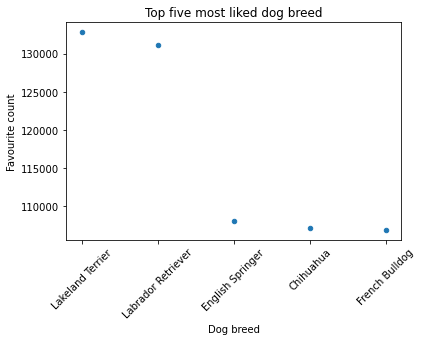

In [57]:
df_greatest.plot(
    x='p1',         
    y='favorite_count',         
    kind='scatter',   
    title='Top five most liked dog breed', 
    legend=True,  
    xlabel='Dog breed',   
    ylabel='Favourite count' 
);
plt.xticks(rotation = 45);